### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
!pip install kaleido
import os


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [129]:
data = pd.read_csv('data/coupons.csv')

In [132]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## 2. Investigate the dataset for missing or problematic data.

#### <span style="font-family:Helvetica; font-size:18px;">**<u>Conclusion</u>:** 
#### POTENTIAL DUPLICATES: I found 74 pairs of identical entries.  After reviewing the duplicates, it is possible that these entries may not represent true duplicates but rather distinct survey responses that share identical characteristics. This could be attributed to the broad categorization used in the data, leading to multiple responses appearing identical despite originating from different individuals or scenarios.  For this reason, I have choosen **not** to remove these responses from the data set.

#### POTENTIAL MISSING DATA: The following missing data was identified.  See section 3 for handling.

    Bar                       107  
    RestaurantLessThan20      130  
    CarryAway                 151  
    Restaurant20To50          189  
    CoffeeHouse               217  
    car                     12576  
        dtype: int64  

#### POTENTIAL OUTLIERS: The describe() method shows that most most of the numerical fields are boolean.  Temperature, while a number, is really categorical in nature as all data points converge on three temperatures 30, 55 an 80 degrees.  There are **no** outliers that need to be handled prior to analysis. </span>


### 2.1 Check for Duplicates

In [136]:
print("Before removing duplicates:", data.shape)

Before removing duplicates: (12684, 26)


In [138]:
#remove duplicates
datanodups = data.drop_duplicates()
print("After removing duplicates:", datanodups.shape)

After removing duplicates: (12610, 26)


In [140]:
# Display duplicate rows in the DataFrame
duplicates = data[data.duplicated(keep=False)]
duplicates.sample(6)

# Save duplicates to a CSV file
duplicates.to_csv('data/candidate_dups.csv', index=False)
duplicates.sample(4)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4959,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,31,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
8506,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,0,1,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
4498,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,less1,1~3,4~8,never,1,1,1,0,1,0


### 2.2 Check for Missing Values


In [143]:
# Identify missing data
missing_counts = data.isnull().sum().sort_values()
print(missing_counts)


destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


In [145]:
# Display only fields with missign data that needs to be addressed.
missing_counts_only = missing_counts[missing_counts > 0]
print(missing_counts_only)

Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


### 2.3. Check for outliers and decide how to handle them



In [149]:
# Use .describe() method to identify numerical fields (fields are either boolean or categorical)

data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Decide what to do about your missing data -- drop, replace, other...

#### <span style="font-family:Helvetica; font-size:20px;">**<u>Conclusion</u>:** 

 - <u>**car (A lot of missing values)</u>:** **Replace nan values with 'car'** as a neutral value. **Drop rows with values in ('do not drive', 'Scooter and motorcycle') as these potentially affect decision making**.  If you do not drive, you are not empowered to make a decisions about route.  If you drive a Scooter, your speed is less making your calculus different when judging distance and time.  This is less than 0.5% reduction in data. 

 - <u>**Bar/CarryAway/CoffeeHouse/RestaurantLessThan20/Restaurant20To50 (Minimal missing values: <1.7% of data, each)</u>:** **Replace nan values with mode value for that field** using the distribution of values as a guide. This should not affect the analysis too much as I plan to evaluate "3 or less" vs "4+" rates of coupon acceptance.  


### 3.1 Investigte unique values and their distribution for each of the fields with missing values 

In [153]:
# Get unique values and their distribution in the 'car' column
data['car'].value_counts(dropna=False)

car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

In [155]:
data['CarryAway'].value_counts(dropna=False)

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64

In [157]:
data['CoffeeHouse'].value_counts(dropna=False)

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64

In [159]:
data['RestaurantLessThan20'].value_counts(dropna=False)

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64

In [161]:
data['Restaurant20To50'].value_counts(dropna=False)

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: count, dtype: int64

In [163]:
data['Bar'].value_counts(dropna=False)

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64

### 3.2 Decide handling of missing values and execute

In [166]:
# Fill NaN values in the 'car' column with 'car' 
data.loc[:, 'car'] = data['car'].fillna('car')

# Filter rows where 'car' is NOT "Scooter and motorcycle" or "do not drive"
data = data.query('car not in ["Scooter and motorcycle", "do not drive"]')


In [168]:
# List of columns to fill with mode values
columns_to_fill = ['Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', 'CoffeeHouse']

# Fill NaN values in each column with the mode value
for col in columns_to_fill:
    data[col] = data[col].fillna(data[col].mode()[0])


In [170]:
# Verify the changes
missing_counts = data.isnull().sum().sort_values()
missing_counts_only = missing_counts[missing_counts > 0]
missing_counts_only.info()  # Should print empty set if all NaN values are filled

<class 'pandas.core.series.Series'>
Index: 0 entries
Series name: None
Non-Null Count  Dtype
--------------  -----
0 non-null      int64
dtypes: int64(1)
memory usage: 0.0+ bytes


In [172]:
# Display the final shape of the  resulting DataFrame
data.shape

(12640, 26)

In [174]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12640.00000,12640.000000,12640.0,12640.000000,12640.000000,12640.000000,12640.000000,12640.00000
mean,63.30894,0.415585,1.0,0.561551,0.119066,0.215032,0.784968,0.56875
std,19.15614,0.492842,0.0,0.496217,0.323880,0.410861,0.410861,0.49527
min,30.00000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.00000
25%,55.00000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.00000
50%,80.00000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.00000
75%,80.00000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.00000
max,80.00000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.00000


## 4. Check and handle outliers

#### <span style="font-family:Helvetica; font-size:20px;">**<u>Conclusion</u>:** 

 - <u>**car (A lot of missing values)</u>:** **Replace nan values with 'car'** as a neutral value. **Drop rows with values in ('do not drive', 'Scooter and motorcycle') as these potentially affect decision making**.  If you do not drive, you are not empowered to make a decisions about route.  If you drive a Scooter, your speed is less making your calculus different when judging distance and time.  This is less than 0.5% reduction in data. 

 - <u>**Bar/CarryAway/CoffeeHouse/RestaurantLessThan20/Restaurant20To50 (Minimal missing values)</u>:** **Replace nan values with mode value for that field** using the distribution of values as a guide. This should not affect the analysis too much as I plan to evaluate "3 or less" vs "4+" rates of coupon acceptance.


## High Level Analysis: Total Population

### 4. What proportion of the total observations chose to accept the coupon?



Y
1    7189
0    5451
Name: count, dtype: int64


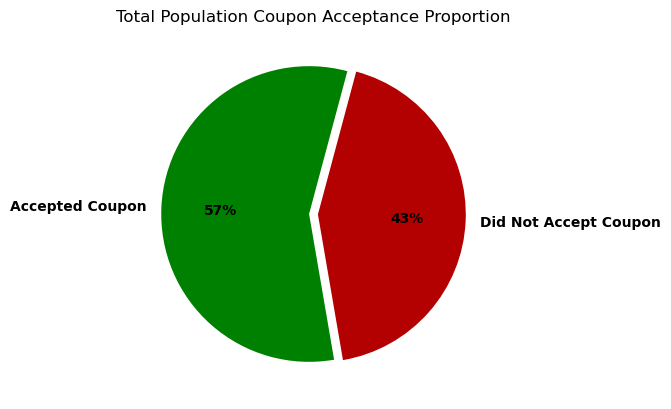

In [179]:
# Count the occurrences of values in the 'Y' column
pop_accept = data['Y'].value_counts()

# Create the pie chart with labels and title
pop_accept.plot(
    kind='pie',
    explode=[0.03, 0.03],
    autopct=lambda p: f'{round(p):.0f}%',  # Round to nearest whole number and format
    colors=['#008000', '#b30000'],
    labels=['Accepted Coupon', 'Did Not Accept Coupon'], 
    ylabel='',  # Remove default ylabel
    title='Total Population Coupon Acceptance Proportion',  
    startangle=75,  # Rotate the chart to start at 75 degrees
    textprops={ 'weight': 'bold'}
)
print(pop_accept)

# Save the plot as an image
output_path = 'images/tot_pop_rate.png'  
plt.savefig(output_path) 

### 5. Use a bar plot to visualize the `coupon` column.

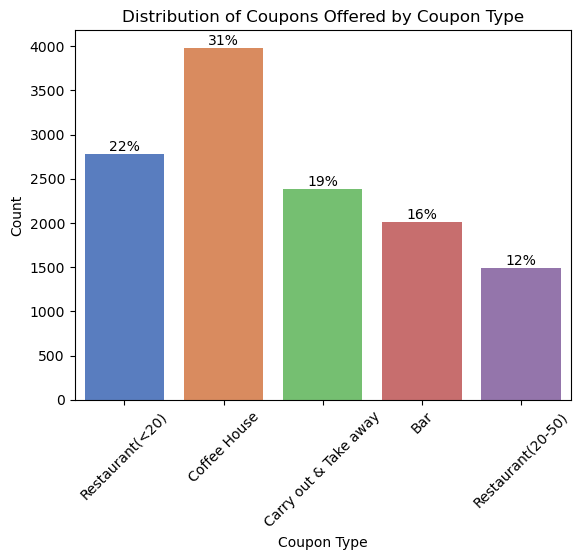

In [182]:
coupons_offered = data['coupon'].value_counts()
total = len(data['coupon'])

ax = sns.countplot(data, 
              x='coupon', 
              hue='coupon', 
              palette='muted')
for p in ax.patches:
    count = p.get_height()  # Get the height of the bar (count)
    percentage = round(100 * count / total)  # Calculate and round the percentage
    ax.annotate(f'{percentage}%', 
                (p.get_x() + p.get_width() / 2., count),  # Position the label
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.title('Distribution of Coupons Offered by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')


# Save the plot as an image
output_path = 'images/offer_proportion.png'  
plt.savefig(output_path) 

plt.show()

### 6. Use a histogram to visualize the `temperature` column.

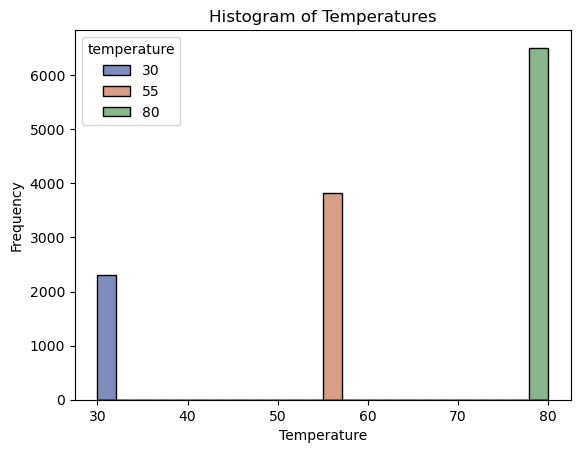

In [185]:
sns.histplot(
    data,
    x=data['temperature'],
    hue = 'temperature',
    palette='dark' 

)
plt.title('Histogram of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

## **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. Create a new `DataFrame` that contains just the bar coupons.


In [190]:
barcoupondata = data.query('coupon == "Bar"')
barcoupondata.shape

(2012, 26)

### 2. What proportion of bar coupons were accepted?


Y
0    1188
1     824
Name: count, dtype: int64


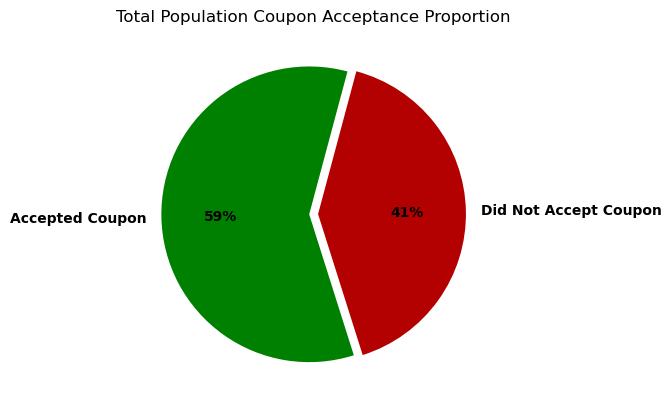

In [193]:
# Count the occurrences of values in the 'Y' column
barpop_accept = barcoupondata['Y'].value_counts()

# Create the pie chart with labels and title
barpop_accept.plot(
    kind='pie',
    explode=[0.03, 0.03],
    autopct=lambda p: f'{round(p):.0f}%',  # Round to nearest whole number and format
    colors=['#008000', '#b30000'],
    labels=['Accepted Coupon', 'Did Not Accept Coupon'], 
    ylabel='',  # Remove default ylabel
    title='Total Population Coupon Acceptance Proportion',  
    startangle=75,  # Rotate the chart to start at 75 degrees
    textprops={ 'weight': 'bold'}
)
print(barpop_accept)



### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [196]:
# Create a copy of the DataFrame
barcoupondata = barcoupondata.copy()

# Define cat_mapping
cat_mapping = {
    'never': 0,
    'less1': 0.5, 
    '1~3': 3,
    '4~8': 4,
    'gt8': 8
}

# Map the "Bar" columns to numerical values
barcoupondata['Bar_numeric'] = barcoupondata['Bar'].map(cat_mapping)


# Add the new column
barcoupondata['barfreq_cat3'] = barcoupondata.apply(
    lambda row: '3 or less' if row['Bar_numeric'] <= 3  else '4+',
    axis=1
)
# Verify the result
print(barcoupondata[['Bar', 'barfreq_cat3']].sample(10, random_state=3))

         Bar barfreq_cat3
3289   less1    3 or less
5369     4~8           4+
12330  never    3 or less
2016   less1    3 or less
3465   never    3 or less
12202    4~8           4+
5939   less1    3 or less
9526   never    3 or less
3395   never    3 or less
2584     1~3    3 or less


barfreq_cat3  Y
3 or less     0    1142
              1     673
4+            0      46
              1     151
dtype: int64


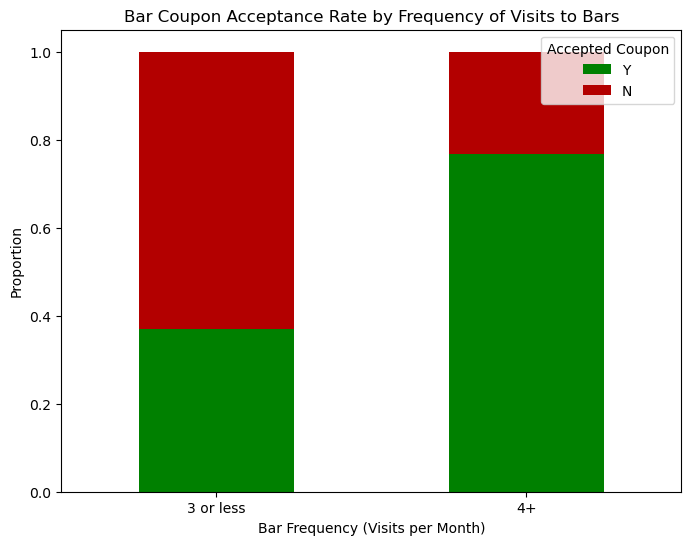

In [198]:

# Count occurrences of Y within each barfreq_cat category
stacked_data = barcoupondata.groupby(['barfreq_cat3', 'Y']).size().unstack(fill_value=0)

# Convert to proportions
proportional_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)

# Reorder the columns to have Y first and N second
proportional_data = proportional_data[[1, 0]]  # Ensure 'Y' (1) is first and 'N' (0) is second

# Plot the proportional stacked bar chart
proportional_data.plot(
    kind='bar',
    stacked=True,
    color=['#008000', '#b30000'],  
    figsize=(8, 6)
)

# Customize the plot
plt.title('Bar Coupon Acceptance Rate by Frequency of Visits to Bars')
plt.xlabel('Bar Frequency (Visits per Month)')
plt.ylabel('Proportion')
plt.legend(title='Accepted Coupon', labels=['Y', 'N'], loc='upper right')
plt.xticks(rotation=0)

print(barcoupondata.groupby(['barfreq_cat3', 'Y']).size())
plt.show()



### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [201]:
# Define mappings for "age" 

age_mapping = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 51
}

# Map the "age" column to numerical values
barcoupondata['age_numeric'] = barcoupondata['age'].map(age_mapping)

#Create the new categories
barcoupondata['category_1_25'] = barcoupondata.apply(
    lambda row: 'Bar Visits > 1 and Age > 25' if row['Bar_numeric'] > 1 and row['age_numeric'] > 25 else 'Others',
    axis=1
)

#Verify the result
print(barcoupondata[['Bar', 'age', 'category_1_25']].sample(10, random_state=40))


         Bar      age                category_1_25
10018    4~8       26  Bar Visits > 1 and Age > 25
1232   never  below21                       Others
11940  less1       31                       Others
9042     1~3       21                       Others
7247     1~3   50plus  Bar Visits > 1 and Age > 25
374    never       31                       Others
8569   never       21                       Others
10752  less1       41                       Others
2086   never       36                       Others
6368     1~3       26  Bar Visits > 1 and Age > 25


category_1_25                Y
Bar Visits > 1 and Age > 25  0     128
                             1     290
Others                       0    1060
                             1     534
dtype: int64


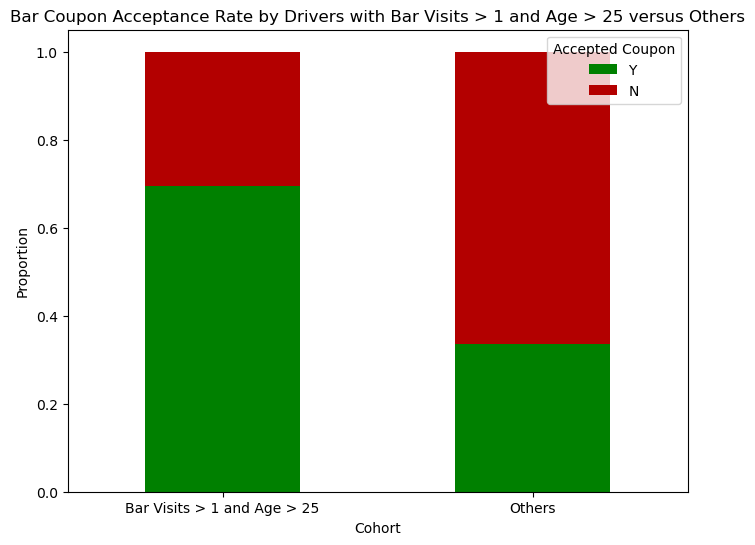

In [203]:

# Count occurrences of Y within each 'category_1_25' category
stacked_data = barcoupondata.groupby(['category_1_25', 'Y']).size().unstack(fill_value=0)

# Convert to proportions
proportional_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)

# Reorder the columns to have Y first and N second
proportional_data = proportional_data[[1, 0]]  # Ensure 'Y' (1) is first and 'N' (0) is second

# Plot the proportional stacked bar chart
proportional_data.plot(
    kind='bar',
    stacked=True,
    color=['#008000', '#b30000'],  # Adjust colors accordingly
    figsize=(8, 6)
)

# Customize the plot
plt.title('Bar Coupon Acceptance Rate by Drivers with Bar Visits > 1 and Age > 25 versus Others')
plt.xlabel('Cohort')
plt.ylabel('Proportion')
plt.legend(title='Accepted Coupon', labels=['Y','N'], loc='upper right')
plt.xticks(rotation=0)

print(barcoupondata.groupby(['category_1_25', 'Y']).size())
plt.show()



### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


bar_pass_occ  Y
Others        0    1030
              1     433
Target        0     158
              1     391
dtype: int64


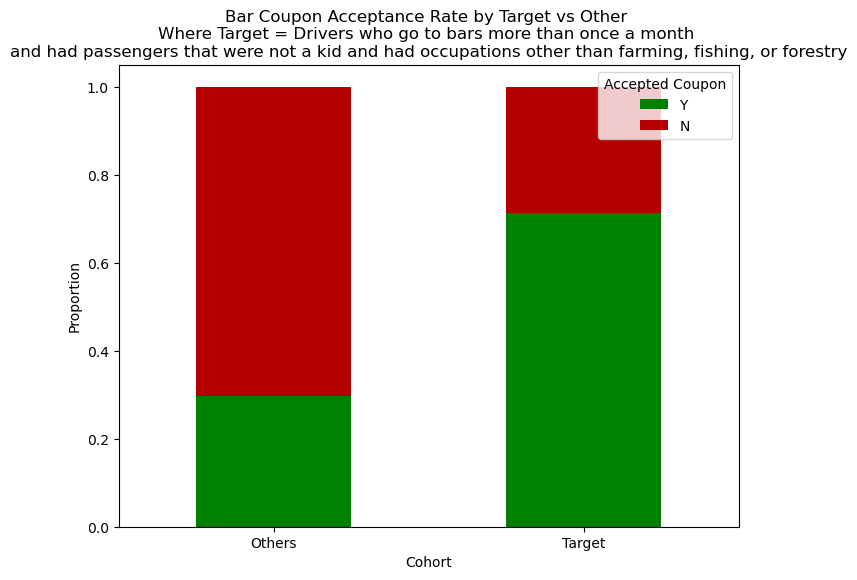

In [206]:
#  Create a new category 'bar_pass_occ'
barcoupondata['bar_pass_occ'] = barcoupondata.apply(
    lambda row: 'Target' if row['Bar_numeric'] > 1 and 
                                     row['passanger'] != 'Kid(s)' and 
                                     row['occupation'] != 'Farming Fishing & Forestry' 
                  else 'Others',
    axis=1
)

# Count occurrences of Y within each 'bar_pass_occ' category
stacked_data = barcoupondata.groupby(['bar_pass_occ', 'Y']).size().unstack(fill_value=0)

# Convert to proportions
proportional_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)

# Reorder the columns to have Y first and N second
proportional_data = proportional_data[[1, 0]]  # Ensure 'Y' (1) is first and 'N' (0) is second

# Plot the proportional stacked bar chart
proportional_data.plot(
    kind='bar',
    stacked=True,
    color=['#008000', '#b30000'],  # Adjust colors accordingly
    figsize=(8, 6)
)

# Customize the plot
plt.title('Bar Coupon Acceptance Rate by Target vs Other \n'
          'Where Target = Drivers who go to bars more than once a month \n'
          'and had passengers that were not a kid and had occupations other than farming, fishing, or forestry')
plt.xlabel('Cohort')
plt.ylabel('Proportion')
plt.legend(title='Accepted Coupon', labels=['Y','N'], loc='upper right')
plt.xticks(rotation=0)

# Step 6: Print grouped data for verification
print(barcoupondata.groupby(['bar_pass_occ', 'Y']).size())
plt.show()



### 6. Compare the acceptance rates between those drivers who:

#### 6.a go to bars more than once a month, had passengers that were not a kid, and were not widowed 



In [209]:
data['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

cat_q6a  Y
Others   0    1030
         1     433
Target   0     158
         1     391
dtype: int64


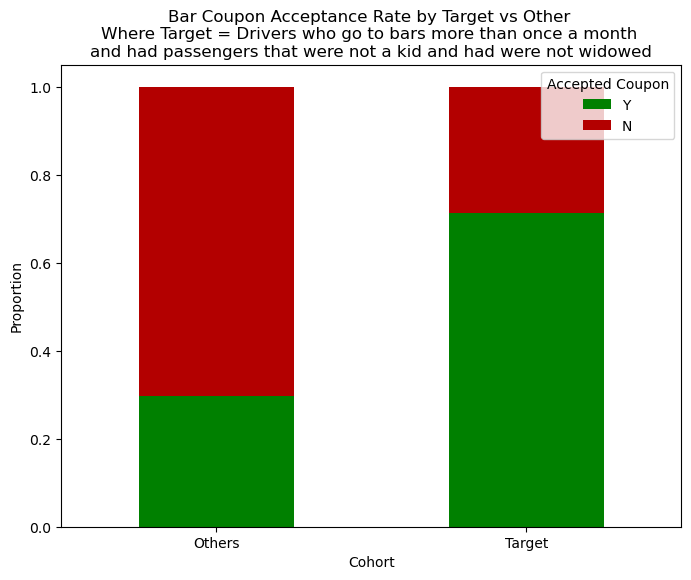

In [211]:
#  Create a new category 'cat_q6a'
barcoupondata['cat_q6a'] = barcoupondata.apply(
    lambda row: 'Target' if row['Bar_numeric'] > 1 and 
                                     row['passanger'] != 'Kid(s)' and 
                                     row['maritalStatus'] != 'Widowed' 
                  else 'Others',
    axis=1
)

# Count occurrences of Y within each 'bar_pass_occ' category
stacked_data = barcoupondata.groupby(['cat_q6a', 'Y']).size().unstack(fill_value=0)

# Convert to proportions
proportional_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)

# Reorder the columns to have Y first and N second
proportional_data = proportional_data[[1, 0]]  # Ensure 'Y' (1) is first and 'N' (0) is second

# Plot the proportional stacked bar chart
proportional_data.plot(
    kind='bar',
    stacked=True,
    color=['#008000', '#b30000'],  # Adjust colors accordingly
    figsize=(8, 6)
)

# Customize the plot
plt.title('Bar Coupon Acceptance Rate by Target vs Other \n'
          'Where Target = Drivers who go to bars more than once a month \n'
          'and had passengers that were not a kid and had were not widowed')
plt.xlabel('Cohort')
plt.ylabel('Proportion')
plt.legend(title='Accepted Coupon', labels=['Y','N'], loc='upper right')
plt.xticks(rotation=0)

# Print grouped data for verification
print(barcoupondata.groupby(['cat_q6a', 'Y']).size())
plt.show()


#### 6.b go to bars more than once a month and are under the age of 30


cat_q6b  Y
Others   0    1092
         1     577
Target   0      96
         1     247
dtype: int64


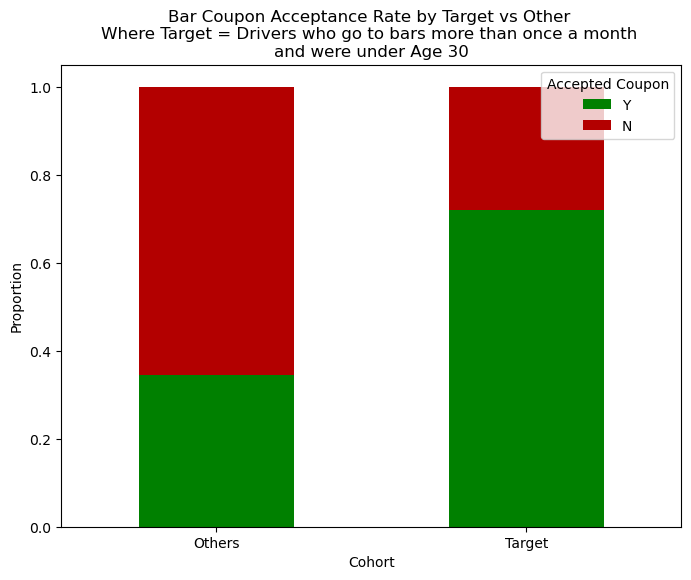

In [215]:
#  Create a new category 'cat_q6b'
barcoupondata['cat_q6b'] = barcoupondata.apply(
    lambda row: 'Target' if row['Bar_numeric'] > 1 and 
                                     row['age_numeric'] < 30 
                  else 'Others',
    axis=1
)

# Count occurrences of Y within each 'cat_q6b' category
stacked_data = barcoupondata.groupby(['cat_q6b', 'Y']).size().unstack(fill_value=0)

# Convert to proportions
proportional_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)

# Reorder the columns to have Y first and N second
proportional_data = proportional_data[[1, 0]]  # Ensure 'Y' (1) is first and 'N' (0) is second

# Plot the proportional stacked bar chart
proportional_data.plot(
    kind='bar',
    stacked=True,
    color=['#008000', '#b30000'],  # Adjust colors accordingly
    figsize=(8, 6)
)

# Customize the plot
plt.title('Bar Coupon Acceptance Rate by Target vs Other \n'
          'Where Target = Drivers who go to bars more than once a month \n'
          'and were under Age 30')
plt.xlabel('Cohort')
plt.ylabel('Proportion')
plt.legend(title='Accepted Coupon', labels=['Y', 'N'], loc='upper right')
plt.xticks(rotation=0)

# Print grouped data for verification
print(barcoupondata.groupby(['cat_q6b', 'Y']).size())
plt.show()

#### 6.c go to cheap restaurants more than 4 times a month and income is less than 50K.

cat_q6c  Y
Others   0    1000
         1     668
Target   0     188
         1     156
dtype: int64


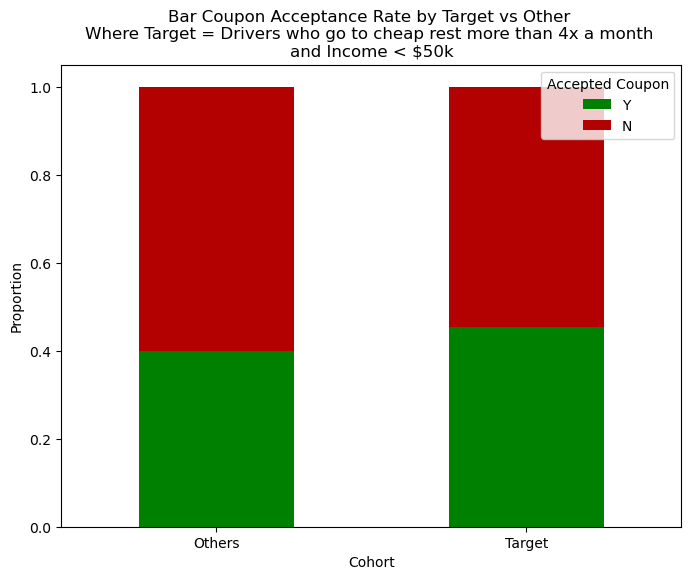

In [218]:
# Define mappings for "income" 

income_mapping = {
    'Less than $12500': 12.4,
    '$12500 - $24999': 12.5,
    '$25000 - $37499': 25,
    '$37500 - $49999': 37.5,
    '$50000 - $62499': 50, 
    '$62500 - $74999': 62.5, 
    '$75000 - $87499': 75, 
    '$87500 - $99999': 87.5,
    '$100000 or More': 100,
}

# Map the "income" column to numerical values
barcoupondata['income_numeric'] = barcoupondata['income'].map(income_mapping)


# Map the "RestaurantLessThan20" (as cheap restaurants) columns to numerical values
barcoupondata['cheapRest_numeric'] = barcoupondata['RestaurantLessThan20'].map(cat_mapping)

#  Create a new category 'cat_q6c'
barcoupondata['cat_q6c'] = barcoupondata.apply(
    lambda row: 'Target' if row['cheapRest_numeric'] >= 4 and 
                                     row['income_numeric'] < 50 
                  else 'Others',
    axis=1
)

# Count occurrences of Y within each 'cat_q6c' category
stacked_data = barcoupondata.groupby(['cat_q6c', 'Y']).size().unstack(fill_value=0)

# Convert to proportions
proportional_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)

# Reorder the columns to have Y first and N second
proportional_data = proportional_data[[1, 0]]  # Ensure 'Y' (1) is first and 'N' (0) is second

# Plot the proportional stacked bar chart
proportional_data.plot(
    kind='bar',
    stacked=True,
    color=['#008000', '#b30000'],  # Adjust colors accordingly
    figsize=(8, 6)
)

# Customize the plot
plt.title('Bar Coupon Acceptance Rate by Target vs Other \n'
          'Where Target = Drivers who go to cheap rest more than 4x a month \n'
          'and Income < $50k')
plt.xlabel('Cohort')
plt.ylabel('Proportion')
plt.legend(title='Accepted Coupon', labels=['Y', 'N'], loc='upper right')
plt.xticks(rotation=0)

# Print grouped data for verification
print(barcoupondata.groupby(['cat_q6c', 'Y']).size())
plt.show()

### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Hypotheses:

**Primary Hypothesis:**
Customer coupon acceptance rates are strongly influenced by prior patronage habits specific to the type of establishment (e.g., bar, coffee house, or upscale restaurant). Customers with a higher historical frequency of visiting such establishments are more likely to accept corresponding coupons.

**Supporting Hypotheses:**

Coupon Expiration Dynamics:

Coupons with a shorter expiration period (e.g., 2 hours) may lead to higher immediate usage, while longer expiration periods (e.g., 1 day) may encourage acceptance for future use. Since success for our usecase includes acceptance for later usage, offering the longer expiration in all cases may help boost acceptance rates.  We might also be open to testing longer experation periods.


Contextual Influence:

Contextual influence such as passangers, direction of travel, and weather may have varying influence on acceptance especially if coupons do not have to be redeemed right away.  However,coupons offered during certain times of day (e.g., morning while heading to work) are less likely to be accepted due to conflicting priorities/mindspace. 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Determine acceptance rate by coupon type to gain an understanding of where to focus

coupon                 Y
Bar                    0    1188
                       1     824
Carry out & Take away  0     630
                       1    1756
Coffee House           0    1989
                       1    1990
Restaurant(20-50)      0     831
                       1     655
Restaurant(<20)        0     813
                       1    1964
dtype: int64


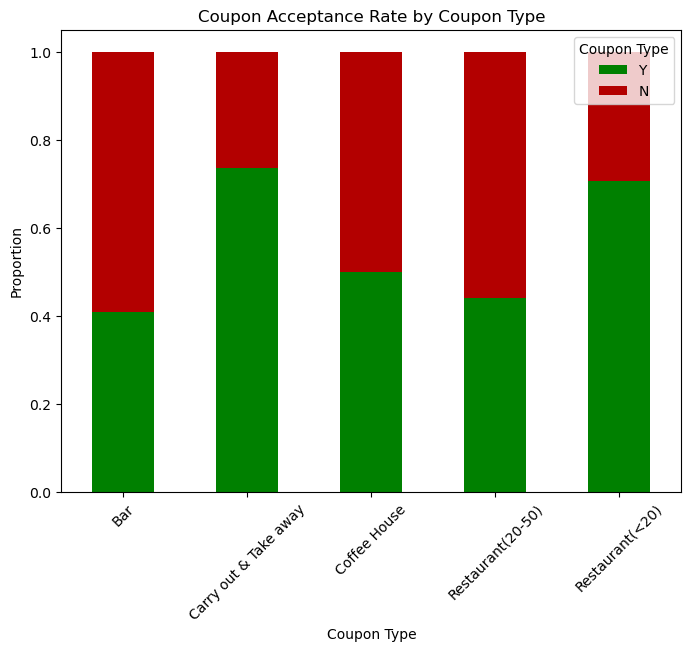

In [227]:

# Count occurrences of Y within each coupon category
stacked_data = data.groupby(['coupon', 'Y']).size().unstack(fill_value=0)

# Convert to proportions
proportional_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)

# Reorder the columns to have Y first and N second
proportional_data = proportional_data[[1, 0]]  # Ensure 'Y' (1) is first and 'N' (0) is second

# Plot the proportional stacked bar chart
proportional_data.plot(
    kind='bar',
    stacked=True,
    color=['#008000', '#b30000'],  # Adjust colors accordingly
    figsize=(8, 6)
)

# Customize the plot
plt.title('Coupon Acceptance Rate by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Proportion')
plt.legend(title='Coupon Type', labels=['Y', 'N'], loc='upper right')  # Update legend order
plt.xticks(rotation=45)

# Print grouped data for verification
print(data.groupby(['coupon', 'Y']).size())


# Save the plot as an image
output_path = 'images/accept_rate_by_type.png'  
plt.savefig(output_path) 

plt.show()

#### Create columns to aid further analysis - simplify or encode 

In [230]:
# Encode category visits per month data into numerical data
data['Bar_numeric'] = data['Bar'].map(cat_mapping)
data['Cheap_numeric'] = data['RestaurantLessThan20'].map(cat_mapping)
data['CarryAway_numeric'] = data['CarryAway'].map(cat_mapping)
data['Fancy_numeric'] = data['Restaurant20To50'].map(cat_mapping)
data['CoffeeHouse_numeric'] = data['CoffeeHouse'].map(cat_mapping)


data.sample(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_numeric,Cheap_numeric,CarryAway_numeric,Fancy_numeric,CoffeeHouse_numeric
8609,No Urgent Place,Alone,Sunny,55,6PM,Coffee House,2h,Female,50plus,Married partner,...,0,0,0,1,0,3.0,4.0,3.0,4.0,4.0
8451,No Urgent Place,Kid(s),Rainy,55,6PM,Carry out & Take away,2h,Female,50plus,Married partner,...,1,0,0,1,1,0.0,3.0,0.5,0.5,8.0


#### Test Primary Hypothesis: IS PRIOR PATRONAGE A POTENTIAL HIGH PREDICTOR OF COUPON ACCEPTANCE?

Conclusion:  Not always.  While correlated for a few of the coupon categories, for the most accepted coupon type (Carry Out), something else seems to be driving the overall higher acceptance rate.

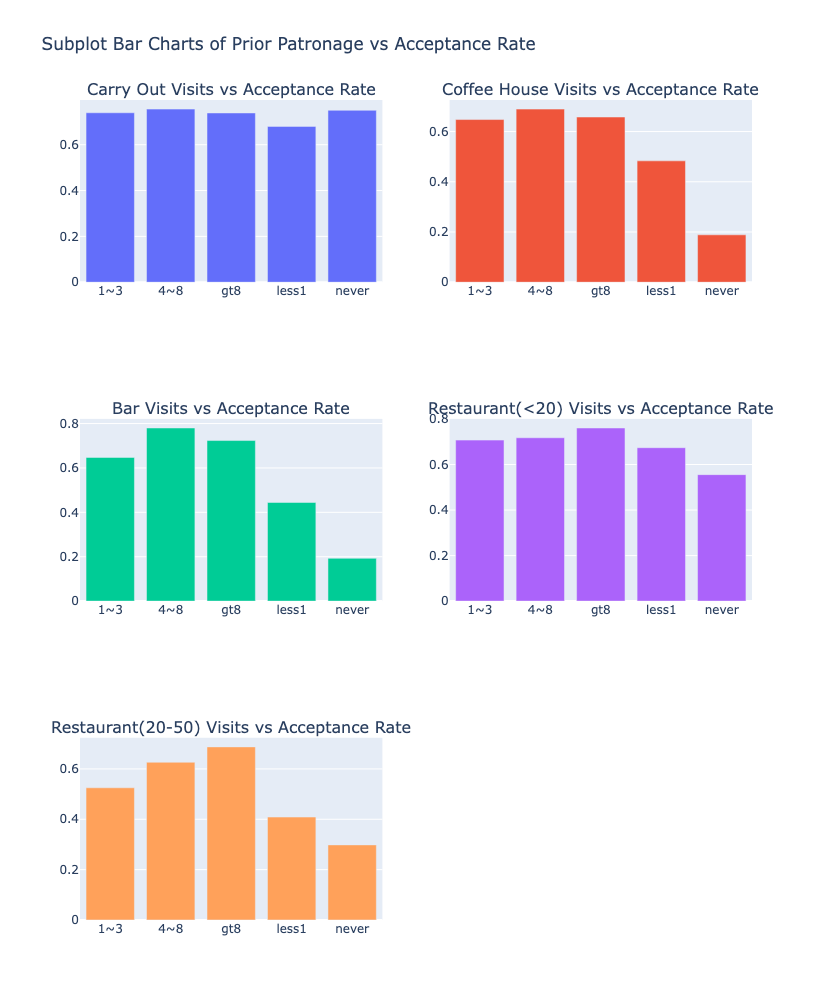

In [234]:
# Calculate mean response for each Coupon Type:  PRIOR PATRONAGE

mean_response_cat1 = data.query('coupon == "Carry out & Take away"').groupby('CarryAway')['Y'].mean().reset_index()
mean_response_cat2 = data.query('coupon == "Coffee House"').groupby('CoffeeHouse')['Y'].mean().reset_index()
mean_response_cat3 = data.query('coupon == "Bar"').groupby('Bar')['Y'].mean().reset_index()
mean_response_cat4 = data.query('coupon == "Restaurant(<20)"').groupby('RestaurantLessThan20')['Y'].mean().reset_index()
mean_response_cat5 = data.query('coupon == "Restaurant(20-50)"').groupby('Restaurant20To50')['Y'].mean().reset_index()

# Create a 2x3 subplot grid
fig = make_subplots(rows=3, cols=2, subplot_titles=('Carry Out Visits vs Acceptance Rate', 
                                                    'Coffee House Visits vs Acceptance Rate', 
                                                    'Bar Visits vs Acceptance Rate', 
                                                    'Restaurant(<20) Visits vs Acceptance Rate', 
                                                    'Restaurant(20-50) Visits vs Acceptance Rate',
                                                   
                                                   ))

# Add bar charts to the subplots
fig.add_trace(
    go.Bar(x=mean_response_cat1['CarryAway'], y=mean_response_cat1['Y'], name='CarryAway'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=mean_response_cat2['CoffeeHouse'], y=mean_response_cat2['Y'], name='CoffeeHouse'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat3['Bar'], y=mean_response_cat3['Y'], name='Bar'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=mean_response_cat4['RestaurantLessThan20'], y=mean_response_cat4['Y'], name='RestaurantLessThan20'),
    row=2, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat5['Restaurant20To50'], y=mean_response_cat5['Y'], name='Restaurant20To50'),
    row=3, col=1
)

fig.update_layout(
    height=1000,
    width=800,
    title_text='Subplot Bar Charts of Prior Patronage vs Acceptance Rate',
    showlegend=False
)



# Show the plot
fig.show()


#### Explore CARRY OUT coupon acceptance vs various attributes.  This coupon type had an above average acceptance rate and improvement for this coupon type will have out weighted impact on overall acceptance rate.



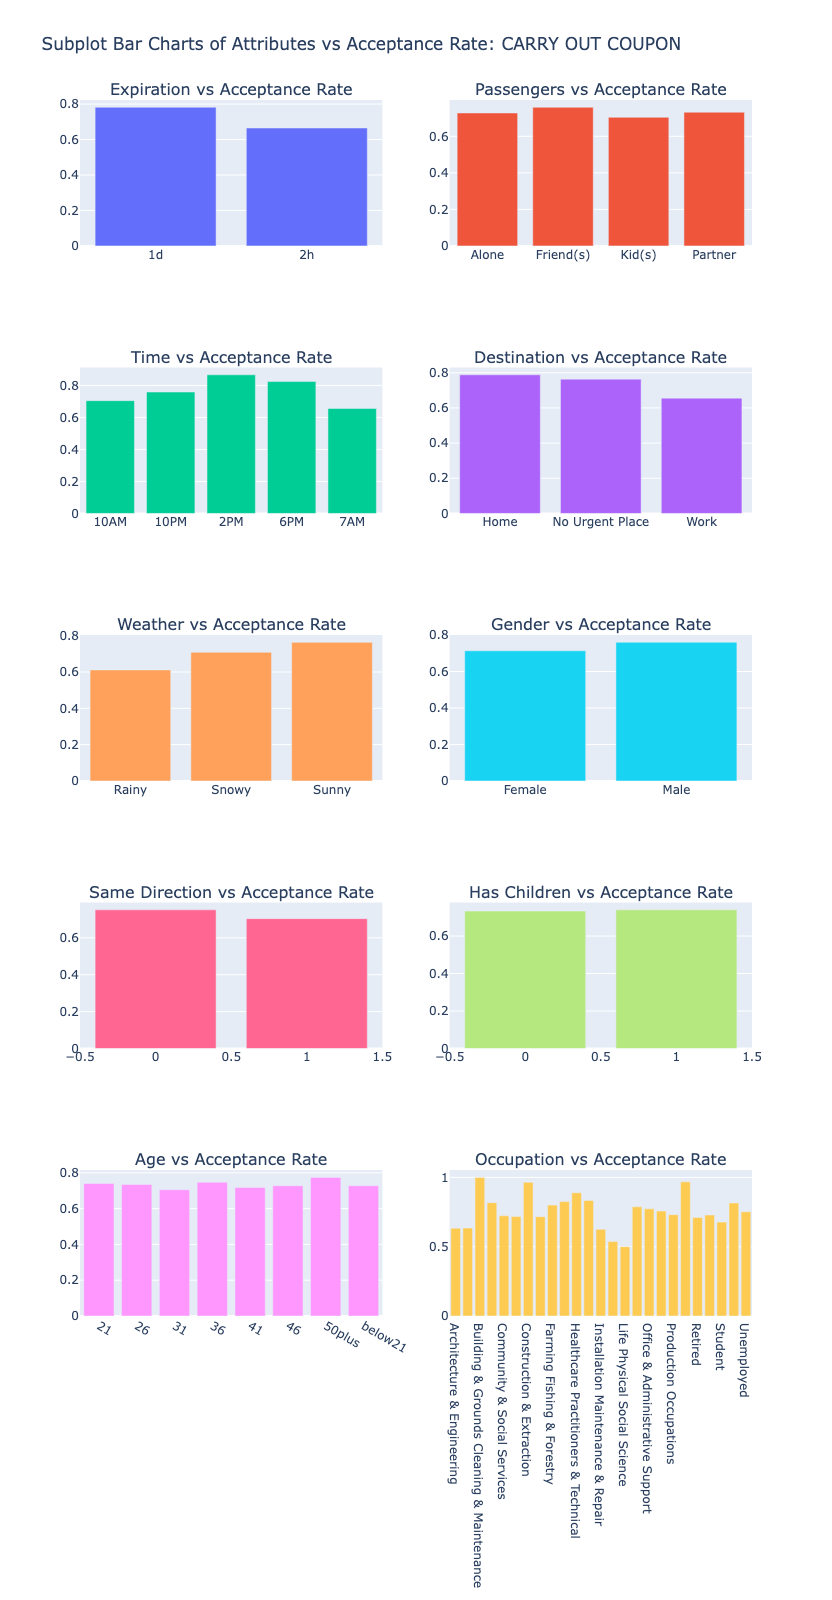

In [238]:
# Calculate mean response for each feature:  CARRY OUT

mean_response_cat1 = data.query('coupon == "Carry out & Take away"').groupby('expiration')['Y'].mean().reset_index()
mean_response_cat2 = data.query('coupon == "Carry out & Take away"').groupby('passanger')['Y'].mean().reset_index()
mean_response_cat3 = data.query('coupon == "Carry out & Take away"').groupby('time')['Y'].mean().reset_index()
mean_response_cat4 = data.query('coupon == "Carry out & Take away"').groupby('destination')['Y'].mean().reset_index()
mean_response_cat5 = data.query('coupon == "Carry out & Take away"').groupby('weather')['Y'].mean().reset_index()
mean_response_cat6 = data.query('coupon == "Carry out & Take away"').groupby('gender')['Y'].mean().reset_index()
mean_response_cat7 = data.query('coupon == "Carry out & Take away"').groupby('direction_same')['Y'].mean().reset_index()
mean_response_cat8 = data.query('coupon == "Carry out & Take away"').groupby('has_children')['Y'].mean().reset_index()
mean_response_cat9 = data.query('coupon == "Carry out & Take away"').groupby('age')['Y'].mean().reset_index()
mean_response_cat10 = data.query('coupon == "Carry out & Take away"').groupby('occupation')['Y'].mean().reset_index()


# Create a 5X2 subplot grid
fig = make_subplots(rows=5, cols=2, subplot_titles=('Expiration vs Acceptance Rate', 
                                                    'Passengers vs Acceptance Rate', 
                                                    'Time vs Acceptance Rate', 
                                                    'Destination vs Acceptance Rate', 
                                                    'Weather vs Acceptance Rate',
                                                    'Gender vs Acceptance Rate',
                                                     'Same Direction vs Acceptance Rate',
                                                    'Has Children vs Acceptance Rate',
                                                    'Age vs Acceptance Rate',
                                                    'Occupation vs Acceptance Rate',
                                                   
                                                   ))

# Add bar charts to the subplots
fig.add_trace(
    go.Bar(x=mean_response_cat1['expiration'], y=mean_response_cat1['Y'], name='expiration'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=mean_response_cat2['passanger'], y=mean_response_cat2['Y'], name='passanger'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat3['time'], y=mean_response_cat3['Y'], name='time'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=mean_response_cat4['destination'], y=mean_response_cat4['Y'], name='destination'),
    row=2, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat5['weather'], y=mean_response_cat5['Y'], name='weather'),
    row=3, col=1
)
fig.add_trace(
    go.Bar(x=mean_response_cat6['gender'], y=mean_response_cat6['Y'], name='gender'),
    row=3, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat7['direction_same'], y=mean_response_cat7['Y'], name='direction_same'),
    row=4, col=1
)
fig.add_trace(
    go.Bar(x=mean_response_cat8['has_children'], y=mean_response_cat8['Y'], name='has_children'),
    row=4, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat9['age'], y=mean_response_cat9['Y'], name='age'),
    row=5, col=1
)
fig.add_trace(
    go.Bar(x=mean_response_cat10['occupation'], y=mean_response_cat10['Y'], name='occupation'),
    row=5, col=2
)

fig.update_layout(
      height=1600,
    width=1000,
    title_text='Subplot Bar Charts of Attributes vs Acceptance Rate: CARRY OUT COUPON',
    showlegend=False
)

# Display the figure
fig.show()



#### Explore CHEAP RESTAURANT coupon acceptance vs various attributes. This coupon type had an above average acceptance rate and improvement for this coupon type will have out weighted impact on overall acceptance rate.


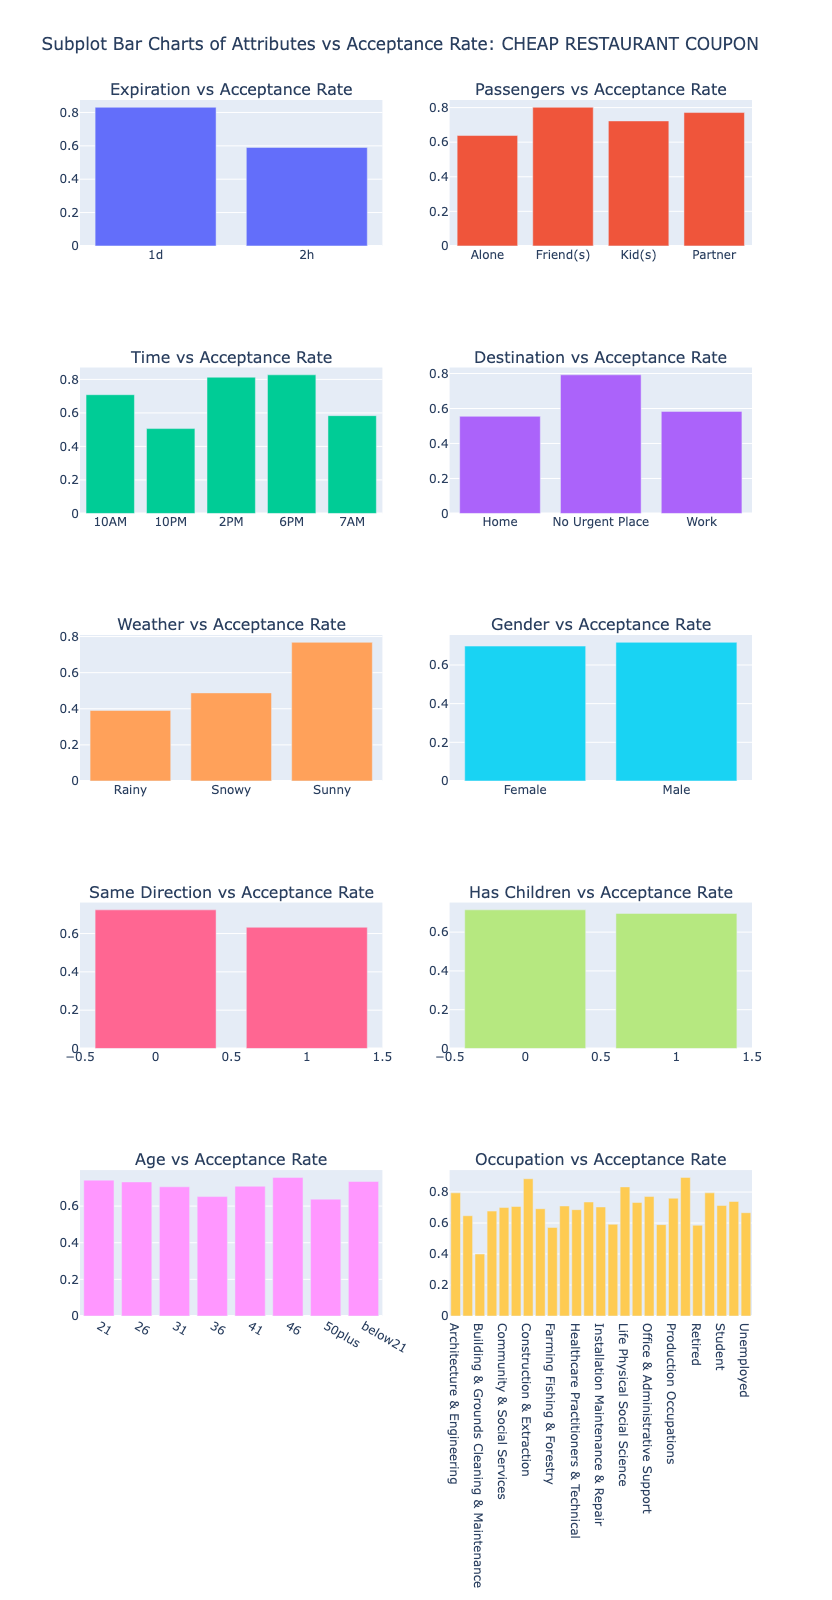

In [241]:
# Calculate mean response for each feature:  CHEAP RESTAURANT

mean_response_cat1 = data.query('coupon == "Restaurant(<20)"').groupby('expiration')['Y'].mean().reset_index()
mean_response_cat2 = data.query('coupon == "Restaurant(<20)"').groupby('passanger')['Y'].mean().reset_index()
mean_response_cat3 = data.query('coupon == "Restaurant(<20)"').groupby('time')['Y'].mean().reset_index()
mean_response_cat4 = data.query('coupon == "Restaurant(<20)"').groupby('destination')['Y'].mean().reset_index()
mean_response_cat5 = data.query('coupon == "Restaurant(<20)"').groupby('weather')['Y'].mean().reset_index()
mean_response_cat6 = data.query('coupon == "Restaurant(<20)"').groupby('gender')['Y'].mean().reset_index()
mean_response_cat7 = data.query('coupon == "Restaurant(<20)"').groupby('direction_same')['Y'].mean().reset_index()
mean_response_cat8 = data.query('coupon == "Restaurant(<20)"').groupby('has_children')['Y'].mean().reset_index()
mean_response_cat9 = data.query('coupon == "Restaurant(<20)"').groupby('age')['Y'].mean().reset_index()
mean_response_cat10 = data.query('coupon == "Restaurant(<20)"').groupby('occupation')['Y'].mean().reset_index()


# Create a 5X2 subplot grid
fig = make_subplots(rows=5, cols=2, subplot_titles=('Expiration vs Acceptance Rate', 
                                                    'Passengers vs Acceptance Rate', 
                                                    'Time vs Acceptance Rate', 
                                                    'Destination vs Acceptance Rate', 
                                                    'Weather vs Acceptance Rate',
                                                    'Gender vs Acceptance Rate',
                                                     'Same Direction vs Acceptance Rate',
                                                    'Has Children vs Acceptance Rate',
                                                    'Age vs Acceptance Rate',
                                                    'Occupation vs Acceptance Rate',
                                                   
                                                   ))

# Add bar charts to the subplots
fig.add_trace(
    go.Bar(x=mean_response_cat1['expiration'], y=mean_response_cat1['Y'], name='expiration'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=mean_response_cat2['passanger'], y=mean_response_cat2['Y'], name='passanger'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat3['time'], y=mean_response_cat3['Y'], name='time'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=mean_response_cat4['destination'], y=mean_response_cat4['Y'], name='destination'),
    row=2, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat5['weather'], y=mean_response_cat5['Y'], name='weather'),
    row=3, col=1
)
fig.add_trace(
    go.Bar(x=mean_response_cat6['gender'], y=mean_response_cat6['Y'], name='gender'),
    row=3, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat7['direction_same'], y=mean_response_cat7['Y'], name='direction_same'),
    row=4, col=1
)
fig.add_trace(
    go.Bar(x=mean_response_cat8['has_children'], y=mean_response_cat8['Y'], name='has_children'),
    row=4, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat9['age'], y=mean_response_cat9['Y'], name='age'),
    row=5, col=1
)
fig.add_trace(
    go.Bar(x=mean_response_cat10['occupation'], y=mean_response_cat10['Y'], name='occupation'),
    row=5, col=2
)

fig.update_layout(
    height=1600,
    width=1000,
    title_text='Subplot Bar Charts of Attributes vs Acceptance Rate: CHEAP RESTAURANT COUPON',
    showlegend=False
)

# Display the figure
fig.show()



#### Explore COFFEE HOUSE coupon acceptance vs various attributes.  This coupon type had the highest proportion of offers relative to other coupon types so improvement on coffee house coupon acceptance could have an outpaced impact to program performance.


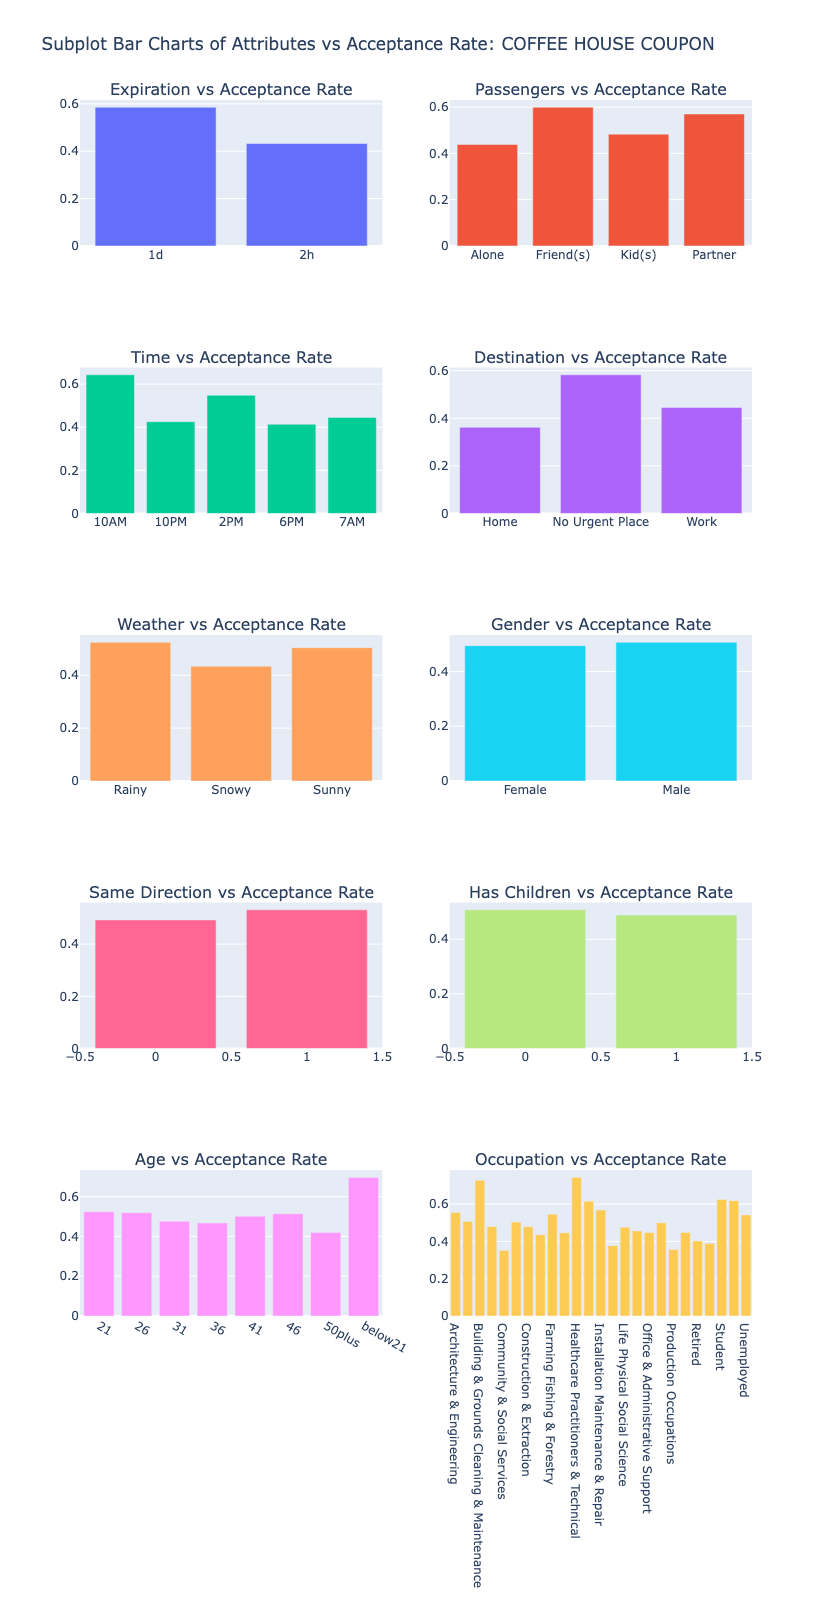

In [244]:
# Calculate mean response for each feature:  COFFEE HOUSE

mean_response_cat1 = data.query('coupon == "Coffee House"').groupby('expiration')['Y'].mean().reset_index()
mean_response_cat2 = data.query('coupon == "Coffee House"').groupby('passanger')['Y'].mean().reset_index()
mean_response_cat3 = data.query('coupon == "Coffee House"').groupby('time')['Y'].mean().reset_index()
mean_response_cat4 = data.query('coupon == "Coffee House"').groupby('destination')['Y'].mean().reset_index()
mean_response_cat5 = data.query('coupon == "Coffee House"').groupby('weather')['Y'].mean().reset_index()
mean_response_cat6 = data.query('coupon == "Coffee House"').groupby('gender')['Y'].mean().reset_index()
mean_response_cat7 = data.query('coupon == "Coffee House"').groupby('direction_same')['Y'].mean().reset_index()
mean_response_cat8 = data.query('coupon == "Coffee House"').groupby('has_children')['Y'].mean().reset_index()
mean_response_cat9 = data.query('coupon == "Coffee House"').groupby('age')['Y'].mean().reset_index()
mean_response_cat10 = data.query('coupon == "Coffee House"').groupby('occupation')['Y'].mean().reset_index()


# Create a 5X2 subplot grid
fig = make_subplots(rows=5, cols=2, subplot_titles=('Expiration vs Acceptance Rate', 
                                                    'Passengers vs Acceptance Rate', 
                                                    'Time vs Acceptance Rate', 
                                                    'Destination vs Acceptance Rate', 
                                                    'Weather vs Acceptance Rate',
                                                    'Gender vs Acceptance Rate',
                                                     'Same Direction vs Acceptance Rate',
                                                    'Has Children vs Acceptance Rate',
                                                    'Age vs Acceptance Rate',
                                                    'Occupation vs Acceptance Rate',
                                                   
                                                   ))

# Add bar charts to the subplots
fig.add_trace(
    go.Bar(x=mean_response_cat1['expiration'], y=mean_response_cat1['Y'], name='expiration'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=mean_response_cat2['passanger'], y=mean_response_cat2['Y'], name='passanger'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat3['time'], y=mean_response_cat3['Y'], name='time'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=mean_response_cat4['destination'], y=mean_response_cat4['Y'], name='destination'),
    row=2, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat5['weather'], y=mean_response_cat5['Y'], name='weather'),
    row=3, col=1
)
fig.add_trace(
    go.Bar(x=mean_response_cat6['gender'], y=mean_response_cat6['Y'], name='gender'),
    row=3, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat7['direction_same'], y=mean_response_cat7['Y'], name='direction_same'),
    row=4, col=1
)
fig.add_trace(
    go.Bar(x=mean_response_cat8['has_children'], y=mean_response_cat8['Y'], name='has_children'),
    row=4, col=2
)
fig.add_trace(
    go.Bar(x=mean_response_cat9['age'], y=mean_response_cat9['Y'], name='age'),
    row=5, col=1
)
fig.add_trace(
    go.Bar(x=mean_response_cat10['occupation'], y=mean_response_cat10['Y'], name='occupation'),
    row=5, col=2
)

fig.update_layout(
    height=1600,
    width=1000,
    title_text='Subplot Bar Charts of Attributes vs Acceptance Rate: COFFEE HOUSE COUPON',
    showlegend=False
)

# Display the figure
fig.show()

